# Tutorial I - Spatial analysis with Python

In this tutorial, we will take a quick tour to Python's (spatial) data science ecosystem and see how we can use some of the fundamental open source Python packages, such as:

 - pandas / geopandas
 - shapely
 - pysal
 - pyproj
 - osmnx 
 - matplotlib (visualization)
 
As you can see, we won't use any GIS software for doing the programming (such as ArcGIS/arcpy or QGIS), but focus on learning the open source packages that are independent from any specific software. These libraries form nowadays not only the core for modern spatial data science, but they are also fundamental parts of commercial applications used and developed by many companies around the world. 

```{note} 

If you have experience working with the Python's spatial data science stack, this tutorial probably does not bring much new to you, but to get everyone on the same page, we will all go through this introductory tutorial.

```

## Contents

 - Reading / writing spatial data
 - Retrieving OpenStreetMap data
 - Reprojections
 - Spatial join
 - Plotting data with matplotlib

## Working with Jupyter Notebooks

Jupyter Notebooks are documents that can be used and run inside the JupyterLab programming environment containing the computer code and rich text elements (such as text, figures, tables and links). 

**A couple of hints**:

- You can **execute a cell** by clicking a given cell that you want to run and pressing <kbd>Shift</kbd> + <kbd>Enter</kbd> (or by clicking the "Play" button on top)
- You can **change the cell-type** between `Markdown` (for writing text) and `Code` (for writing/executing code) from the dropdown menu above. 

See **further details and help for** [**using Notebooks and JupyterLab from here**](https://pythongis.org/part1/chapter-01/nb/04-using-jupyterlab.html).

## Fundamental library: Geopandas

In this course, the most often used Python package that you will learn is [geopandas](https://geopandas.org/). Geopandas makes it possible to work with geospatial data in Python in a relatively easy way. Geopandas combines the capabilities of the data analysis library [pandas](https://pandas.pydata.org/pandas-docs/stable/) with other packages like [shapely](https://shapely.readthedocs.io/en/stable/manual.html) and [fiona](https://fiona.readthedocs.io/en/latest/manual.html) for managing spatial data. The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas. In case you wish to have additional help getting started with pandas, we recommend you to take a look at Chapter 3 from the openly available [Introduction to Python for Geographic Data Analysis -book](https://pythongis.org/part1/chapter-03/index.html). The main difference between GeoDataFrames and pandas DataFrames is that a [GeoDataFrame](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geodataframe) should contain (at least) one column for geometries. By default, the name of this column is `'geometry'`. The geometry column is a [GeoSeries](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geoseries) which contains the geometries (points, lines, polygons, multipolygons etc.) as shapely objects. 

![geodataframe.png](img/geodataframe.png)


## Reading and writing spatial data

Next we will learn some of the basic functionalities of geopandas. We have a couple of GeoJSON files stored in the `data` folder that we will use.

We can read the data easily with `read_file()` -function:

In [5]:
import geopandas as gpd

# Filepath
fp = "data/buildings.geojson"

# Read the file
data = gpd.read_file(fp)

# How does it look?
data.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:street,email,name,opening_hours,operator,...,start_date,wikipedia,id,timestamp,version,tags,osm_type,internet_access,changeset,geometry
0,Helsinki,None,29,None,00170,Unioninkatu,None,None,None,None,...,None,None,4253124,1542041335,4,None,way,None,NaN,"POLYGON ((24.95121 60.16999, 24.95122 60.16988..."
1,Helsinki,None,2,None,00100,Kaivokatu,ainfo@ateneum.fi,Ateneum,"Tu, Fr 10:00-18:00; We-Th 10:00-20:00; Sa-Su 1...",None,...,1887,fi:Ateneumin taidemuseo,8033120,1544822447,27,"{ ""architect"": ""Theodor Höijer"", ""contact:webs...",way,None,NaN,"POLYGON ((24.94477 60.16982, 24.9445 60.16981,..."
2,Helsinki,FI,22-24,None,None,Mannerheimintie,None,Lasipalatsi,None,None,...,1936,fi:Lasipalatsi,8035238,1533831167,23,"{ ""name:fi"": ""Lasipalatsi"", ""name:sv"": ""Glaspa...",way,None,NaN,"POLYGON ((24.93561 60.17045, 24.93555 60.17054..."
3,Helsinki,None,2,None,00100,Mannerheiminaukio,None,Kiasma,Tu 10:00-17:00; We-Fr 10:00-20:30; Sa 10:00-18...,None,...,1998,fi:Kiasma (rakennus),8042215,1553963033,30,"{ ""name:en"": ""Museum of Modern Art Kiasma"", ""n...",way,None,NaN,"POLYGON ((24.93682 60.17152, 24.93662 60.1715,..."
4,None,FI,None,None,None,None,None,None,None,None,...,None,None,15243643,1546289715,7,None,way,None,NaN,"POLYGON ((24.93675 60.16779, 24.9366 60.16789,..."


As we can see, the GeoDataFrame contains various attributes in separate columns. The `geometry` column contains the spatial information. We can take a look of some of the basic information about our GeoDataFrame with command:

In [6]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   addr:city           86 non-null     object  
 1   addr:country        57 non-null     object  
 2   addr:housenumber    88 non-null     object  
 3   addr:housename      4 non-null      object  
 4   addr:postcode       54 non-null     object  
 5   addr:street         89 non-null     object  
 6   email               2 non-null      object  
 7   name                81 non-null     object  
 8   opening_hours       8 non-null      object  
 9   operator            7 non-null      object  
 10  phone               8 non-null      object  
 11  ref                 1 non-null      object  
 12  url                 8 non-null      object  
 13  website             20 non-null     object  
 14  building            486 non-null    object  
 15  amenity             26 non-null 

From here, we can see that our data is indeed a GeoDataFrame object with 486 entries and 34 columns. You can also get descriptive statistics of your data by calling:

In [7]:
data.describe()

,id,timestamp,version,changeset
count,4.860000e+02,4.860000e+02,486.000000,66.0
mean,1.400780e+08,1.455829e+09,4.849794,0.0
std,1.633527e+08,9.247528e+07,4.561162,0.0
min,8.253000e+03,1.197929e+09,1.000000,0.0
25%,2.294267e+07,1.374229e+09,2.000000,0.0
50%,1.228699e+08,1.493288e+09,3.000000,0.0
75%,1.359805e+08,1.530222e+09,7.000000,0.0
max,1.042029e+09,1.555840e+09,31.000000,0.0


In this case, we didn't have many columns with numerical data, but typically you have numeric values in your dataset and this is a good way to get a quick view how the data look like.

Naturally, as the data is **spatial**, we want to visualize it to understand the nature of the data better. We can do this easily with `plot()` method:

<Axes: >

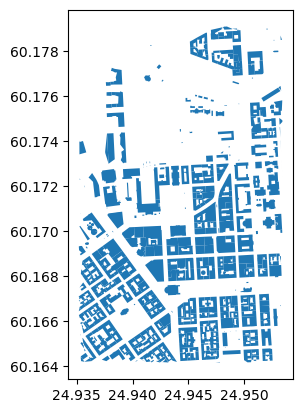

In [8]:
data.plot()

Now we can see that the data indeed represents buildings (in central Helsinki). Naturally we can also write this data to disk. Geopandas supports writing data to various data formats as well as to PostGIS which is the most widely used open source database for GIS. Let's write the data as a Shapefile to the same `data` directory from where we read the data. When writing data to local disk you can use `to_file()` method:

In [9]:
# Output filepath
outfp = "data/buildings_copy.gpkg"
data.to_file(outfp)

## Retrieving data from OpenStreetMap

Now we have seen how to read spatial data from disk. OpenStreetMap (OSM) is probably the most well known and widely used spatial dataset/database in the world. Also in this course, we will use OSM data frequently. Hence, let's see how we can retrieve data from OSM using a library called [omsnx](https://osmnx.readthedocs.io/). With `osmnx` you can easily download and extract data from anywhere in the world based on the [Overpass API](https://dev.overpass-api.de/overpass-doc/en/preface/preface.html). You can use `osmnx` e.g. to retrieve OSM data around a given address and applying a  2 km buffer around this location. Hence, `osmnx` is a very flexible library in terms of specifying the area of interest. 

OSM is a "database of the world", hence it contains **a lot** of information about different things. With `osmnx` you can easily extract information about:

- street networks --> `ox.graph_from_place(query)` | `ox.graph_from_polygon(polygon)`
- buildings --> `ox.features_from_place(query, tags={"building": True})` | `ox.features_from_polygon(polygon, tags={"building": True})`
- Amenities --> `ox.features_from_place(query, tags={"amenity": True})` | `ox.features_from_polygon(polygon, tags={"amenity": True})`
- landuse --> `ox.features_from_place(query, tags={"landuse": True})` | `ox.features_from_polygon(polygon, tags={"landuse": True})`
- natural elements --> `ox.features_from_place(query, tags={"natural": True})` | `ox.features_from_polygon(polygon, tags={"natural": True})`
- boundaries --> `ox.features_from_place(query, tags={"boundary": True})` | `ox.features_from_polygon(polygon, tags={"boundary": True})`

Let's see how we can download and extract OSM data about buildings for Helsinki central area using `osmnx`:

In [10]:
import osmnx as ox
from shapely.geometry import box

# Bounding box for given area (Helsinki city centre)
bounds = [24.9351773, 60.1641551, 24.9534055, 60.1791068]

# Create a bounding box Polygon
bbox = box(*bounds)

# Retrieve buildings from the given area
buildings = ox.features_from_polygon(bbox, tags={"building": True})

/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


In [11]:
buildings.head()

geometry  \
element  id                                                              
node     55211772                            POINT (24.95158 60.17716)   
         5643347516                          POINT (24.94393 60.17412)   
relation 4198        POLYGON ((24.94898 60.17811, 24.94897 60.17826...   
         5603        POLYGON ((24.93696 60.16574, 24.93791 60.16607...   
         5605        POLYGON ((24.93758 60.16662, 24.93788 60.16672...   

                    addr:city addr:country addr:housenumber addr:postcode  \
element  id                                                                 
node     55211772    Helsinki           FI                4         00530   
         5643347516       NaN          NaN              NaN           NaN   
relation 4198             NaN          NaN              NaN           NaN   
         5603             NaN          NaN              NaN           NaN   
         5605             NaN          NaN              NaN           NaN   

                               addr:street air_conditioning   brand  \
element  id                                                           
node     55211772    John Stenbergin ranta              yes  Hilton   
         5643347516                    NaN              NaN     NaN   
relation 4198                          NaN              NaN     NaN   
         5603                          NaN              NaN     NaN   
         5605                          NaN              NaN     NaN   

                    brand:wikidata    building  ... changing_table  \
element  id                                     ...                  
node     55211772          Q598884         yes  ...            NaN   
         5643347516            NaN        roof  ...            NaN   
relation 4198                  NaN  apartments  ...            NaN   
         5603                  NaN         yes  ...            NaN   
         5605                  NaN  apartments  ...            NaN   

                    toilets:disposal unisex          type long_name  \
element  id                                                           
node     55211772                NaN    NaN           NaN       NaN   
         5643347516              NaN    NaN           NaN       NaN   
relation 4198                    NaN    NaN  multipolygon       NaN   
         5603                    NaN    NaN  multipolygon       NaN   
         5605                    NaN    NaN  multipolygon       NaN   

                    long_name:en last_roof_renovation  ele electrified  \
element  id                                                              
node     55211772            NaN                  NaN  NaN         NaN   
         5643347516          NaN                  NaN  NaN         NaN   
relation 4198                NaN                  NaN  NaN         NaN   
         5603                NaN                  NaN  NaN         NaN   
         5605                NaN                  NaN  NaN         NaN   

                    nohousenumber  
element  id                        
node     55211772             NaN  
         5643347516           NaN  
relation 4198                 NaN  
         5603                 NaN  
         5605                 NaN  

[5 rows x 166 columns]

Let's check how many buildings did we get:

In [12]:
len(buildings)

556

Okay, so in this sample there are over 500 buildings in the Helsinki city center area. Naturally, we would like to see them on a map. Let's plot our data using `plot()` (might take some time as there are many objects to plot):

<Axes: >

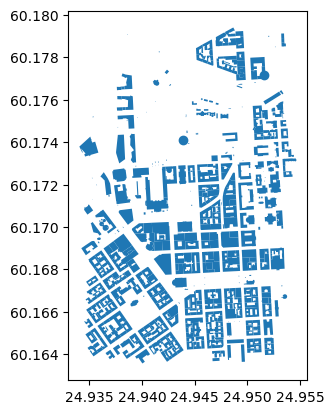

In [13]:
buildings.plot()

Great! As a result we got a map that seems to look correct. 

## Reprojecting data

As we can see from the previous maps that we have produced, the coordinates on the x and y axis hint that our geometries are represented in decimal degrees (WGS84). 
In many cases, you want to reproject your data to another CRS. Luckily, doing that is easy with `geopandas`. Let's first take a look what the Coordinate Reference System (CRS) of our GeoDataFrame is. We can access the CRS information of the GeoDataFrame by accessing an attribute called `crs`:

In [14]:
buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

As a result, we get information about the CRS, and we can see that the data is indeed in WGS84. We can also see that the EPSG code for the CRS is 4326.
We can easily reproject our data by using a method `to_crs()`. The easiest way to use the method is to specify the destination CRS as an EPSG code. Let's reproject our data into EPSG 3067 which is the most widely used projected coordinate reference system used in Finland, EUREF-FIN: 

In [15]:
projected = buildings.to_crs(epsg=3067)
projected.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

As we can see, now we have an `Projected CRS` as a result. To confirm the difference, let's take a look at the geometry of the first row in our original `buildings` GeoDataFrame and the `projected` GeoDataFrame. To select a specific row in data, we can use the `iloc` indexing:

In [16]:
orig_geom = buildings.iloc[4]["geometry"]
projected_geom = projected.iloc[4]["geometry"]

print("Orig:\n", orig_geom, "\n")
print("Proj:\n", projected_geom)

Orig:
 POLYGON ((24.9375782 60.1666195, 24.9378834 60.1667239, 24.9380204 60.1667708, 24.9383738 60.1665151, 24.938475 60.1664419, 24.9384826 60.1664364, 24.9384644 60.1664302, 24.9381689 60.166329, 24.937947 60.1662531, 24.9379354 60.1662615, 24.9376981 60.1664331, 24.9374847 60.1665875, 24.9375782 60.1666195), (24.9380198 60.1664339, 24.9380093 60.1664415, 24.9380613 60.1664593, 24.938074 60.1664501, 24.9381297 60.1664692, 24.9380864 60.1665005, 24.9380542 60.1664895, 24.9380219 60.1665128, 24.9380543 60.1665239, 24.9379768 60.16658, 24.9379475 60.1665699, 24.9378994 60.1666048, 24.9379289 60.1666149, 24.9378765 60.1666528, 24.9377978 60.1666259, 24.9378163 60.1666125, 24.9377221 60.1665803, 24.9379551 60.1664118, 24.9380198 60.1664339)) 

Proj:
 POLYGON ((385554.31899878354 6671754.572437016, 385571.61418283475 6671765.666812931, 385579.37784035725 6671770.650990822, 385598.0949883824 6671741.570552162, 385603.45498608454 6671733.24557284, 385603.8575069612 6671732.620069053, 385602

As we can see the coordinates that form our Polygon has changed from decimal degrees to **meters**. Let's see what happens if we just call the geometries:

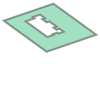

In [17]:
orig_geom

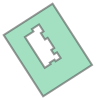

In [18]:
projected_geom

As you can see, we can draw the geometry directly in the screen, and we can easily see the difference in the shape of the two geometries. The `orig_geom` and `projected_geom` variables contain a Shapely geometry which is `Polygon` in this case. We can confirm this by checking the type:

In [19]:
type(orig_geom)

shapely.geometry.polygon.Polygon

These shapely geometries are used as the underlying data structure in most GIS packages in Python to present geometrical information. Shapely is fundamentally a Python wrapper for [GEOS](https://trac.osgeo.org/geos/) which is widely used library (written in C++) under the hood of many GIS softwares such as QGIS, GDAL, GRASS, PostGIS, Google Earth etc. Currently, there is [ongoing work](https://pygeos.readthedocs.io/en/latest/) to vectorize all the GEOS functionalities for Python and bring those eventually into Shapely which will greatly boost the performance of all geometry related operations in Python ecosystem (approaching the same efficiency as PostGIS). Some of these improvements can already be found under the hood of latest version of geopandas.

## Calculating area

One thing that is quite often interesting to know when working with spatial data, is the `area` of the geometries. In geopandas, we can easily calculate e.g. the area for each of our buildings by: 

In [20]:
projected["building_area"] = projected.area
projected["building_area"].describe()

count     556.000000
mean     1013.323416
std      1122.707889
min         0.000000
25%       181.756660
50%       751.565464
75%      1379.316608
max      8419.656661
Name: building_area, dtype: float64

We calculated the area by calling `area` which is the attribute containing information about areas of the buildings measured based on the map units of the data. Hence, in this case because our data is projected in Euref-FIN the units that we stored in `"building_area"` column are **square meters**. It's important to always keep in mind the CRS when calculating areas, distances etc. with geometries.  

## Spatial join

A commonly needed GIS functionality, is to be able to merge information between two layers using location as the `key`. Hence, it is somewhat similar approach as *table join* but because the operation is based on geometries, it is called *spatial join*. 
Next, we will see how we can conduct a spatial join and merge information between two layers. We will read all restaurants from the OSM for Helsinki Region, and combine information from restaurants to the underlying building (*restaurants typically are within buildings*). We will again use `osmnx` for reading the data, but this time we will get all amenities with tags "restaurant", "bar" or "pub":

/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


<Axes: >

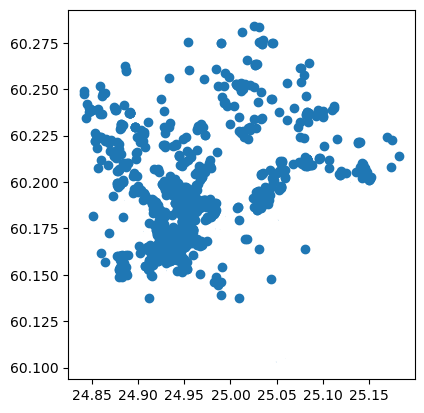

In [21]:
# Read restaurants
query = "Helsinki, Finland"
restaurants = ox.features_from_place(query, tags={"amenity": ["restaurant", "bar", "pub"]})
restaurants.plot()

In [22]:
restaurants.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1623 entries, ('node', 25101780) to ('way', 1276432323)
Columns: 242 entries, geometry to building:material
dtypes: geometry(1), object(241)
memory usage: 3.1+ MB


As we can see, the OSM for Helsinki contains more than 1500 restaurants altogether. As you can probably guess, the OSM data is far from "perfect" in terms of the quality of the restaurant listings. This is due to the voluntary nature of adding information to the OpenStreetMap, and the fact restaurants (as well as other POI features) are highly dynamic by nature, i.e. new amenities open and close all the time, and it is challenging to keep up to date with those changes (this is a challenge even for commercial companies).  

Let's also fetch buildings for the whole Helsinki area:

In [23]:
# Read restaurants
query = "Helsinki, Finland"
hki_buildings = ox.features_from_place(query, tags={"building": True})
hki_buildings.shape

/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/s

(64179, 772)

<Axes: >

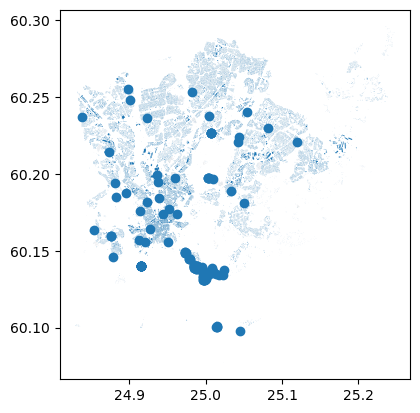

In [24]:
hki_buildings.plot()

There are altogether over 60 thousand buildings in Helsinki. As you can see, there are some buildings that are not proper Polygons but they are represented as points that are shown quite clearly in the map above. Because OpenStreetMap data is crowdsourced it is possible that some features in the data are not These points are something called OSM `node` elements while the Polygons are presented either with `way` or `relation` elements. You can remove the `node` elements from the data by selecting only the `"way"` and `"relation"` elements from the index as follows:

In [34]:
hki_buildings = hki_buildings.loc[["way", "relation"]].copy()

<Axes: >

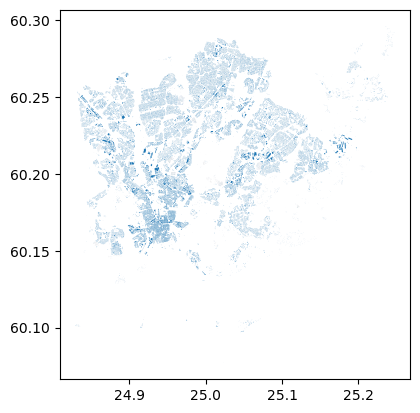

In [36]:
# Plot buildings without "extra" Points
hki_buildings.plot()

Joining data from buildings to the restaurants can be done easily using `sjoin()` function from geopandas:

In [37]:
# Join information from buildings to restaurants
join = gpd.sjoin(restaurants, hki_buildings)

# Print column names
join.columns

Index(['geometry', 'addr:city_left', 'addr:country_left', 'amenity_left',
       'name_left', 'contact:website_left', 'cuisine_left',
       'opening_hours_left', 'diet:kosher_left', 'diet:vegan_left',
       ...
       'castle_type', 'old_name:en', 'payment:cheque',
       'payment:diners_club_right', 'payment:maestro', 'supervised',
       'service:vehicle:brakes', 'service:vehicle:oil_change',
       'service:vehicle:painting', 'service:vehicle:repairs'],
      dtype='object', length=1015)

<Axes: >

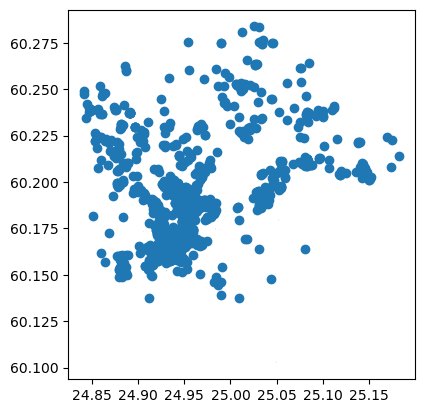

In [31]:
# Visualize the data as well
join.plot()

As we can see from the above, now we have merged information from the buildings to restaurants. The geometries of the `left` GeoDataFrame, i.e. restaurants were kept by default as the geometries.

Finally, we can fetch the administrative borders for our area of interest. In the following, we will fetch the boundaries for the are in the city center of Helsinki (Kluuvi):

In [39]:
query = "Kluuvi, Helsinki"

# Retrieve admin borders from the given area
borders = ox.features_from_place(query, tags={"admin_level": "10"})
borders.explore()

/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/tenkanh2/micromamba/envs/geo/lib/python3.11/site-packages/s

As you can see, `osmnx` returns (for a reason or another) not only the boundaries of "Kluuvi, Helsinki", but also the neighboring areas. We can filter the data and only get the area of our interest by selecting the rows based on `"name"` column:

In [40]:
borders.head()

geometry  \
element  id                                                          
relation 184705  POLYGON ((24.94121 60.16772, 24.94223 60.16775...   
         184712  POLYGON ((24.95038 60.17638, 24.95114 60.1764,...   
         184713  POLYGON ((24.93435 60.17205, 24.93396 60.17213...   
         184714  POLYGON ((24.92064 60.16483, 24.92073 60.16484...   
         184727  POLYGON ((24.88223 60.17211, 24.8992 60.18172,...   

                admin_level        boundary      type             name  \
element  id                                                              
relation 184705          10  administrative  boundary  Kaartinkaupunki   
         184712          10  administrative  boundary      Kruununhaka   
         184713          10  administrative  boundary           Kluuvi   
         184714          10  administrative  boundary           Kamppi   
         184727          10  administrative  boundary        Etu-Töölö   

                         name:fi       name:sv ref  wikidata  \
element  id                                                    
relation 184705  Kaartinkaupunki  Gardesstaden  03  Q1017793   
         184712      Kruununhaka    Kronohagen  01  Q1772186   
         184713           Kluuvi         Gloet  02  Q1393571   
         184714           Kamppi        Kampen  04   Q729552   
         184727        Etu-Töölö   Främre Tölö  13  Q2741998   

                          wikipedia    alt_name                loc_name  
element  id                                                              
relation 184705  fi:Kaartinkaupunki         NaN                     NaN  
         184712      fi:Kruununhaka  Kruunuhaka  Krunikka;Kruna;Krunika  
         184713           fi:Kluuvi         NaN                     NaN  
         184714           fi:Kamppi         NaN                     NaN  
         184727        fi:Etu-Töölö         NaN                     NaN

In [41]:
# Select only the row for "Kluuvi"
borders = borders.loc[borders["name"]=="Kluuvi"]

# Show the selected area on a map
borders.explore()

### Selecting data using sjoin

One handy trick and efficient trick for spatial join is to use it for **selecting data**. We can e.g. select all buildings that intersect with restaurants by conducting the spatial join other way around, i.e. using the buildings as the left GeoDataFrame and the restaurants as the right GeoDataFrame:

<Axes: >

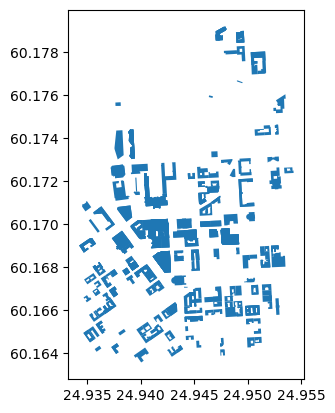

In [32]:
# Merge information from restaurants to buildings (conducts selection at the same time)
join2 = gpd.sjoin(buildings, restaurants, how="inner", predicate="intersects")
join2.plot()

As we can see (although the small building geometries are a bit poorly visible), the end result is a layer of buildings which intersected with the restaurants. This is a straightforward way to conduct simple spatial queries. You can specify with `predicate` parameter whether the binary predicate between the layers (i.e. the spatial relation between geometries) should be:

- `intersects`
- `contains`
- `within`

## Plotting data with matplotlib

Thus far, we haven't really made any effort to make our maps visually appealing. Let's next see how we can adjust the appearance of our map, and how we can visualize many layers on top of each other. Let's start by visualizing the buildings that we selected earlier and adjust a bit of the colors and figuresize. We can adjust the color of polygons with `facecolor` parameter and the figure size with `figsize` parameter that accepts a tuple of width and height as an argument:

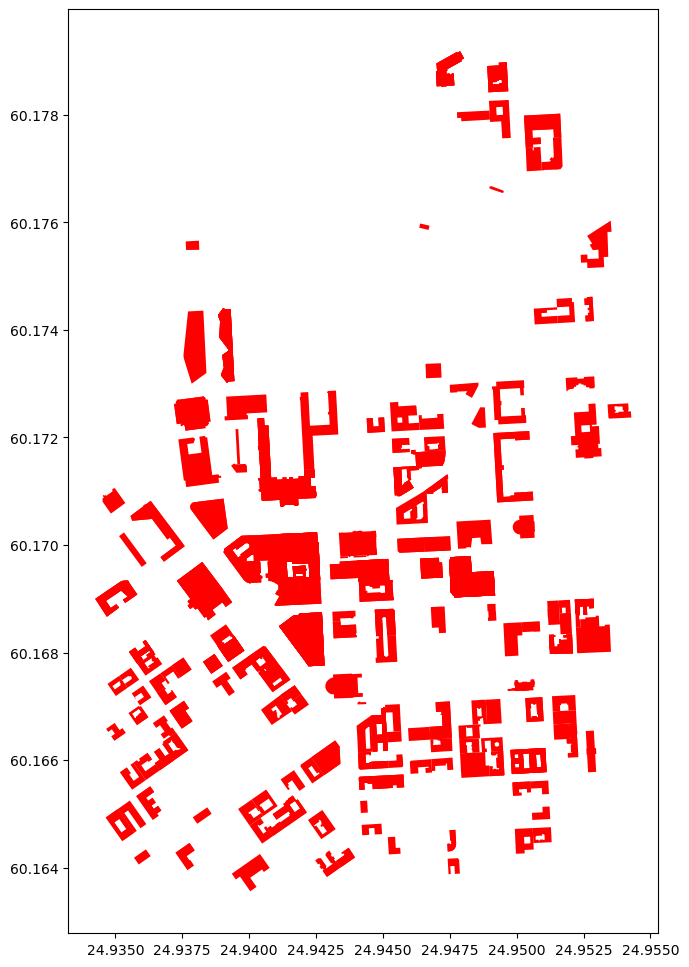

In [33]:
ax = join2.plot(facecolor="red", figsize=(12,12))

In [34]:
join2.columns

Index(['geometry', 'addr:city_left', 'addr:country_left',
       'addr:housenumber_left', 'addr:postcode_left', 'addr:street_left',
       'air_conditioning_left', 'brand_left', 'building_left',
       'contact:facebook_left',
       ...
       'roof:levels_right', 'seamark:small_craft_facility:category',
       'seamark:type', 'building:colour_right', 'roof:shape_right',
       'building:part', 'height_right', 'roof:height_right', 'indoor',
       'building:material_right'],
      dtype='object', length=391)

Now with the bigger figure size, it is already a bit easier to see the selected buildings that have a restaurant inside them (according OSM). Let's color our buildings based on the building type. Hence, each building type category will receive a different color:  

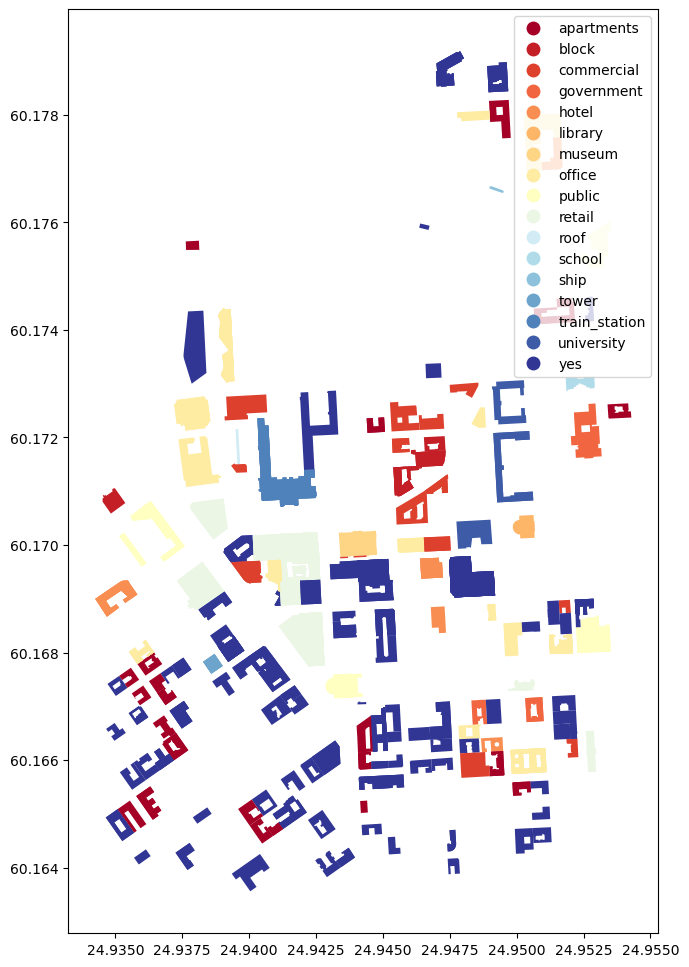

In [35]:
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

Now we used the parameter `column` to specify the attribute that is used to specify the color for each building (can be categorical or continuous). We used `cmap` to specify the colormap for the categories and we added the legend by specifying `legend=True`. 

To get a bit more context to our visualizaton. Let's also add roads with our buildings. To do that we first need to extract the roads from OSM:

In [36]:
# Get roads (retrieves walkable roads by default)
G = ox.graph_from_polygon(bbox)

# Parse roads from the graph
roads = ox.graph_to_gdfs(G, nodes=False, edges=True) 

Now we can continue and add the roads as a layer to our visualization with gray line color:

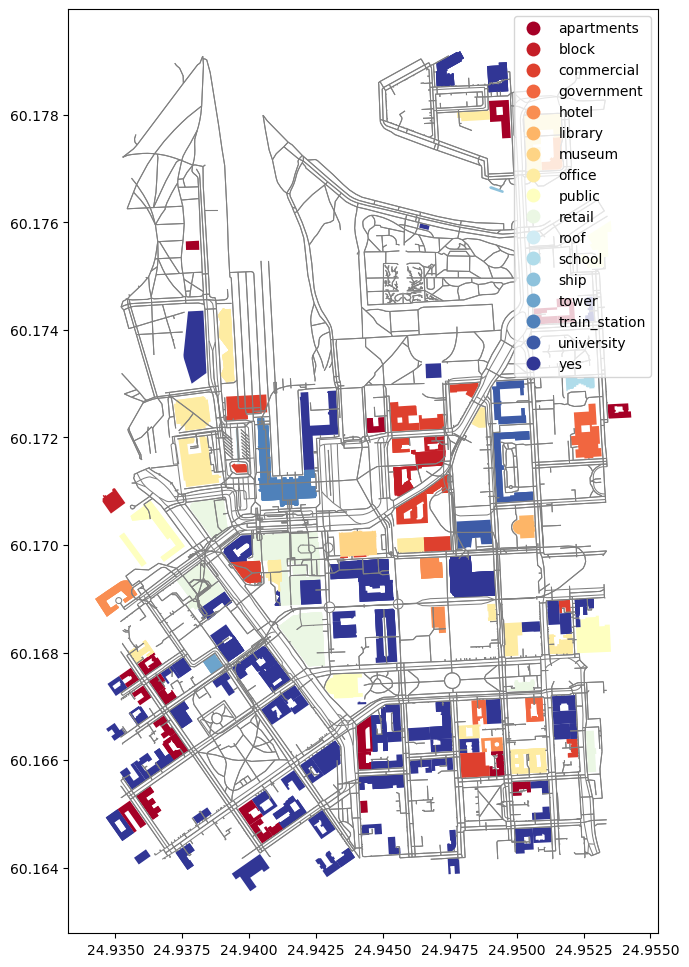

In [37]:
# Plot the map again
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

# Plot the roads into the same axis
ax = roads.plot(ax=ax, edgecolor="gray", linewidth=0.75)

Perfect! Now it is much easier to understand our map because the roads brought much more context (assuming you know Helsinki). We ware able to add the roads to the same map by specifying the `ax` parameter to point to the axis that we received when first plotting the `join2` (i.e. selected buildings). In a similar manner, you can add as many layers in your map as you wish. Let's still do a small visual trick and specify that the background color in our map is black instead of white. This can be done easily by changing the `style` of matplotlib visualization renderer:

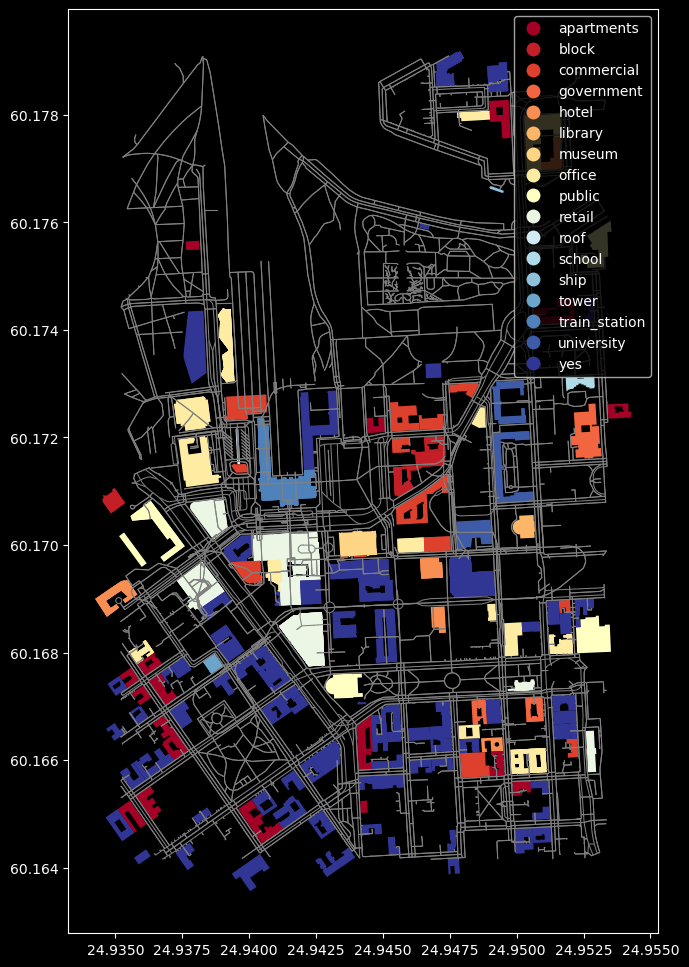

In [38]:
# Import matplotlib pyplot and use a dark_background theme
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Plot the map again
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

# Plot the roads into the same axis
ax = roads.plot(ax=ax, edgecolor="gray", linewidth=0.75)


Awesome! Now we have a nice dark theme with our map. With this information you should be able to get going with Exercise 1. 

## Further information

For further information, we recommend reading the Chapter 6 from the [Introduction to Python for Geographic Data Analysis](https://python-gis-book.readthedocs.io/en/develop/part2/chapter-06/index.html) -book.

We also recommend checking the materials from [Automating GIS Processes](https://autogis.github.io/) -course (GIS things) and [Geo-Python](https://geo-python.github.io/) -course (intro to Python and data analysis with pandas). In addition, we always recommend to check the latest documentation from the websites of the libraries:

 - [geopandas](https://geopandas.org/) 
 - [osmnx](https://osmnx.readthedocs.io/en/stable/)
 - [matplotlib](https://matplotlib.org/)
 - [pandas](https://pandas.pydata.org/)